<a href="https://colab.research.google.com/github/apallath/cats_vs_dogs_models/blob/main/cats_vs_dogs_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mount Google Drive
import os, shutil
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load subset of Cats v/s Dogs image dataset

In [3]:
train_cats = '/content/drive/MyDrive/colab_data/cats_vs_dogs_small/train/cats'
train_dogs = '/content/drive/MyDrive/colab_data/cats_vs_dogs_small/train/dogs'
val_cats = '/content/drive/MyDrive/colab_data/cats_vs_dogs_small/val/cats'
val_dogs = '/content/drive/MyDrive/colab_data/cats_vs_dogs_small/val/dogs'
test_cats = '/content/drive/MyDrive/colab_data/cats_vs_dogs_small/test/cats'
test_dogs = '/content/drive/MyDrive/colab_data/cats_vs_dogs_small/test/dogs'

print(len(os.listdir(train_cats)))
print(len(os.listdir(train_dogs)))
print(len(os.listdir(val_cats)))
print(len(os.listdir(val_dogs)))
print(len(os.listdir(test_cats)))
print(len(os.listdir(test_dogs)))

1000
1000
500
500
500
500


In [4]:
# Use Keras ImageDataGenerator to create train, val, and test datasets
train_datagen = ImageDataGenerator(rescale=1.0/255)
val_datagen = ImageDataGenerator(rescale=1.0/255)

train_gen = train_datagen.flow_from_directory('/content/drive/MyDrive/colab_data/cats_vs_dogs_small/train/',
                                              target_size=(150, 150),
                                              batch_size=20,
                                              class_mode='binary')

val_gen = val_datagen.flow_from_directory('/content/drive/MyDrive/colab_data/cats_vs_dogs_small/val/',
                                              target_size=(150, 150),
                                              batch_size=20,
                                              class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [5]:
# Batch size
for batch_data, batch_labels in train_gen:
    print(batch_data.shape)
    print(batch_labels.shape)
    break

(20, 150, 150, 3)
(20,)


# Baseline CNN

In [6]:
def get_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))
    model.add(layers.MaxPool2D((2, 2)))
    model.add(layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
    model.add(layers.MaxPool2D((2, 2)))
    model.add(layers.Conv2D(128, kernel_size=(3,3), activation='relu'))
    model.add(layers.MaxPool2D((2, 2)))
    model.add(layers.Conv2D(128, kernel_size=(3,3), activation='relu'))
    model.add(layers.MaxPool2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

In [7]:
model = get_model()
model.summary()
model.compile(optimizer=optimizers.Adam(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [8]:
history = model.fit(train_gen,
                    steps_per_epoch=100, #2000 = 100 * 20
                    epochs=30,
                    validation_data=val_gen,
                    validation_steps=50) #1000 = 50 * 20

Epoch 1/30
100/100 [==============================] - 15s 119ms/step - loss: 0.6985 - accuracy: 0.5071 - val_loss: 0.6854 - val_accuracy: 0.5000
Epoch 2/30
100/100 [==============================] - 12s 117ms/step - loss: 0.6589 - accuracy: 0.5997 - val_loss: 0.6946 - val_accuracy: 0.5480
Epoch 3/30
100/100 [==============================] - 12s 117ms/step - loss: 0.6330 - accuracy: 0.6301 - val_loss: 0.5909 - val_accuracy: 0.6920
Epoch 4/30
100/100 [==============================] - 12s 116ms/step - loss: 0.5297 - accuracy: 0.7403 - val_loss: 0.5712 - val_accuracy: 0.7020
Epoch 5/30
100/100 [==============================] - 12s 116ms/step - loss: 0.4965 - accuracy: 0.7558 - val_loss: 0.5726 - val_accuracy: 0.6960
Epoch 6/30
100/100 [==============================] - 12s 116ms/step - loss: 0.4725 - accuracy: 0.7780 - val_loss: 0.5508 - val_accuracy: 0.7190
Epoch 7/30
100/100 [==============================] - 11s 115ms/step - loss: 0.4503 - accuracy: 0.7899 - val_loss: 0.5433 - val_ac

In [9]:
model.save('/content/drive/MyDrive/colab_models/cats_vs_dogs_v1.h5')

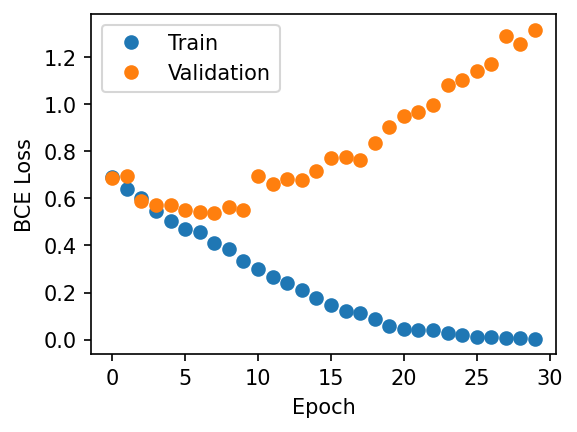

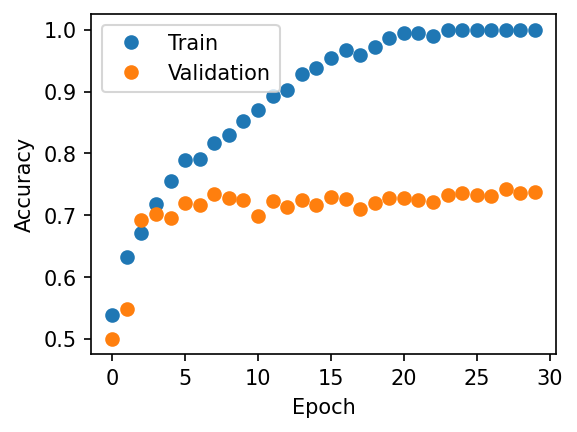

In [10]:
n_epochs = 30

fig, ax = plt.subplots(figsize=(4,3), dpi=150)
ax.plot(range(n_epochs), history.history['loss'], 'o', label="Train")
ax.plot(range(n_epochs), history.history['val_loss'], 'o', label="Validation")
ax.set_xlabel("Epoch")
ax.set_ylabel("BCE Loss")
ax.legend()

fig, ax = plt.subplots(figsize=(4,3), dpi=150)
ax.plot(range(n_epochs), history.history['accuracy'], 'o', label="Train")
ax.plot(range(n_epochs), history.history['val_accuracy'], 'o', label="Validation")
ax.set_xlabel("Epoch")
ax.set_ylabel("Accuracy")
ax.legend()

In [11]:
# Test eval
test_datagen = ImageDataGenerator(rescale=1.0/255)
test_gen = test_datagen.flow_from_directory('/content/drive/MyDrive/colab_data/cats_vs_dogs_small/test/',
                                            target_size=(150, 150),
                                            batch_size=20,
                                            class_mode='binary')

test_loss, test_acc = model.evaluate(test_gen, steps=50)

print(test_loss)
print(test_acc)

Found 1000 images belonging to 2 classes.
50/50 [==============================] - 4s 73ms/step - loss: 1.2639 - accuracy: 0.7190
1.2639055252075195
0.718999981880188


(150, 150, 3)
True:  Dog | Predicted:  Dog


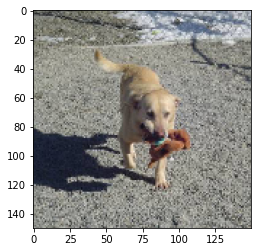

In [14]:
# Prediction
classes = ['Cat', 'Dog']

catsdogs = [test_cats, test_dogs]

true = np.random.randint(0, 2)

picked = catsdogs[true]
fnames = [os.path.join(picked, fname) for fname in os.listdir(picked)]
img_path = fnames[np.random.randint(0, 500)]
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img) / 255.0
print(x.shape)
plt.imshow(x)

predicted = model.predict(x.reshape(1, 150, 150, 3))

print("True: ", classes[true], "| Predicted: ", classes[int(predicted > 0.5)])

# CNN with data augmentation and dropout

In [25]:
# Data augmentation
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                   rotation_range=45,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

train_gen = train_datagen.flow_from_directory('/content/drive/MyDrive/colab_data/cats_vs_dogs_small/train/',
                                              target_size=(150, 150),
                                              batch_size=20, # increase images from 2000 -> 3200 with augmentations
                                              class_mode='binary')

Found 2000 images belonging to 2 classes.


In [26]:
# Dropout
def get_dropout_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))
    model.add(layers.MaxPool2D((2, 2)))
    model.add(layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
    model.add(layers.MaxPool2D((2, 2)))
    model.add(layers.Conv2D(128, kernel_size=(3,3), activation='relu'))
    model.add(layers.MaxPool2D((2, 2)))
    model.add(layers.Conv2D(128, kernel_size=(3,3), activation='relu'))
    model.add(layers.MaxPool2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

In [27]:
model = get_dropout_model()
model.summary()
model.compile(optimizer=optimizers.Adam(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 15, 15, 128)      

In [28]:
history = model.fit(train_gen,
                    steps_per_epoch=100, #2000 = 100 * 20
                    epochs=100,
                    validation_data=val_gen,
                    validation_steps=50) #1000 = 50 * 20

Epoch 1/100
100/100 [==============================] - 21s 202ms/step - loss: 0.6946 - accuracy: 0.4974 - val_loss: 0.6864 - val_accuracy: 0.5090
Epoch 2/100
100/100 [==============================] - 20s 201ms/step - loss: 0.6866 - accuracy: 0.5691 - val_loss: 0.6698 - val_accuracy: 0.6010
Epoch 3/100
100/100 [==============================] - 20s 200ms/step - loss: 0.6768 - accuracy: 0.5843 - val_loss: 0.6533 - val_accuracy: 0.6030
Epoch 4/100
100/100 [==============================] - 20s 200ms/step - loss: 0.6569 - accuracy: 0.6095 - val_loss: 0.6439 - val_accuracy: 0.6090
Epoch 5/100
100/100 [==============================] - 20s 201ms/step - loss: 0.6248 - accuracy: 0.6506 - val_loss: 0.6397 - val_accuracy: 0.6260
Epoch 6/100
100/100 [==============================] - 20s 199ms/step - loss: 0.6202 - accuracy: 0.6522 - val_loss: 0.5933 - val_accuracy: 0.6700
Epoch 7/100
100/100 [==============================] - 20s 199ms/step - loss: 0.5985 - accuracy: 0.6774 - val_loss: 0.5916 -

In [29]:
model.save('/content/drive/MyDrive/colab_models/cats_vs_dogs_v2.h5')

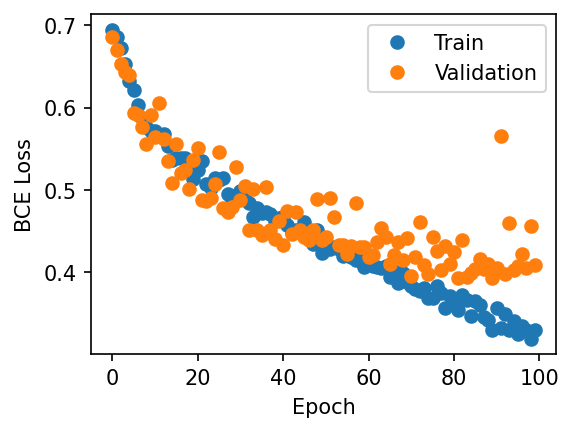

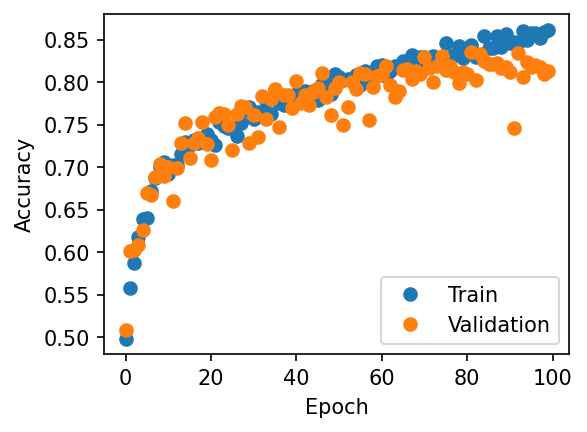

In [30]:
n_epochs = 100

fig, ax = plt.subplots(figsize=(4,3), dpi=150)
ax.plot(range(n_epochs), history.history['loss'], 'o', label="Train")
ax.plot(range(n_epochs), history.history['val_loss'], 'o', label="Validation")
ax.set_xlabel("Epoch")
ax.set_ylabel("BCE Loss")
ax.legend()

fig, ax = plt.subplots(figsize=(4,3), dpi=150)
ax.plot(range(n_epochs), history.history['accuracy'], 'o', label="Train")
ax.plot(range(n_epochs), history.history['val_accuracy'], 'o', label="Validation")
ax.set_xlabel("Epoch")
ax.set_ylabel("Accuracy")
ax.legend()

(150, 150, 3)
True:  Dog | Predicted:  Dog


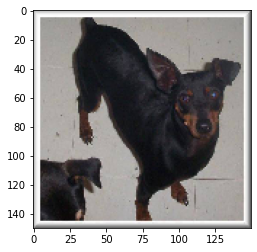

In [31]:
# Prediction
classes = ['Cat', 'Dog']

catsdogs = [test_cats, test_dogs]

true = np.random.randint(0, 2)

picked = catsdogs[true]
fnames = [os.path.join(picked, fname) for fname in os.listdir(picked)]
img_path = fnames[np.random.randint(0, 500)]
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img) / 255.0
print(x.shape)
plt.imshow(x)

predicted = model.predict(x.reshape(1, 150, 150, 3))

print("True: ", classes[true], "| Predicted: ", classes[int(predicted > 0.5)])